Text(0, 0.5, 'data')

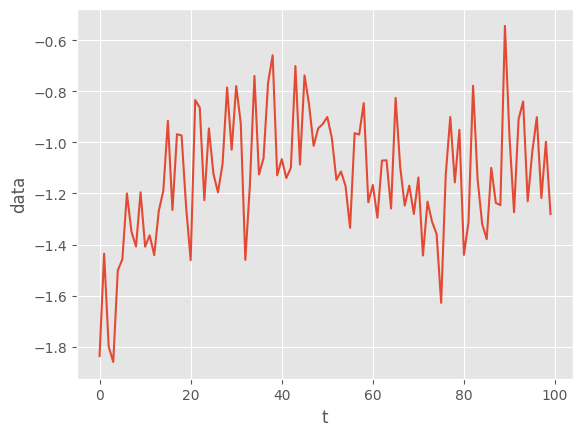

In [33]:
'''Investigation into the Kalman Filter and its variants'''

import numpy as np
import matplotlib.pyplot as plt
from particles import state_space_models as ssm
from particles import distributions as dists
from particles.collectors import Moments

'''A simple single state SSM, stochastic volatility model'''

class SV(ssm.StateSpaceModel): 
    default_params = {'mu':-1,'rho':0.95,'sigma':0.2}

    def PX0(self): 
        return dists.Normal(self.mu,(self.sigma**2)/(1-self.rho**2))
    
    def PX(self,t,xp): 
        return dists.Normal(loc=self.mu + self.rho*(xp - self.mu),scale = self.sigma**2)
    
    def PY(self,t,xp,x):
        return dists.Normal(x,self.sigma)


model = SV() 
x, y = model.simulate(100)

plt.style.use('ggplot')
plt.plot(y)
plt.xlabel('t')
plt.ylabel('data')




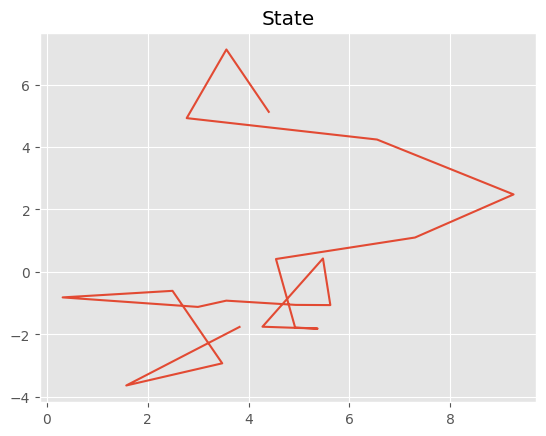

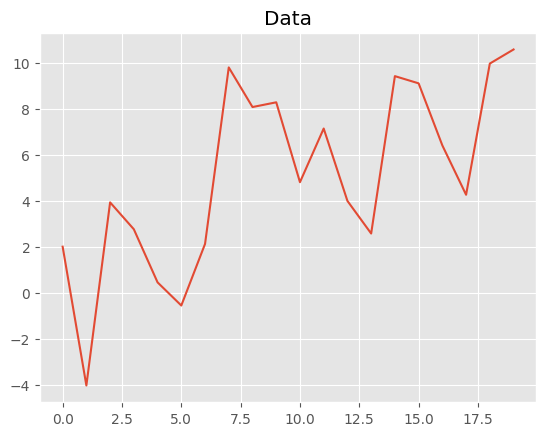

MeanAndCov(mean=array([0.67243509, 0.67243509]), cov=array([[ 3.33333333, -1.66666667],
       [-1.66666667,  3.33333333]]))


In [122]:
from particles import kalman
import particles

ssm = kalman.MVLinearGauss(F=np.eye(2), G=np.ones((1, 2)), covX=np.diag(np.array([5,5])),
                           covY=5)

x,y = ssm.simulate(20)

state = np.squeeze(x)


plt.title("State")
plt.plot(state[:,0],state[:,1])
plt.show()


plt.title("Data")
plt.plot(np.squeeze(y))
plt.show()

kf = kalman.Kalman(ssm=ssm, data=np.squeeze(y))
kf.filter()

print(kf.filt[0])


